## Posttest 3 

Nama : Muhammad Akbar Fahrezi

NIM  : 2109106117

Kelas: C1-21

Dataset yang digunakan = Bank Customer Churn Dataset


## Membaca Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("Bank Customer Churn Prediction.csv")

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Visualisasi Data 1 (Grafik Batang)

## Perbandingan Kredit Score Pengguna Kartu Kredit dengan yang tidak menggunakan Kartu kredit


In [2]:
# Mengubah Kolom credit_score menjadi nilai categorical
df['credit_score'] = pd.cut(df['credit_score'], bins = [0,629,689,719,850], labels=['Bad','Fair','Good','Excellent'])

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,Bad,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Bad,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Bad,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Good,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Excellent,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


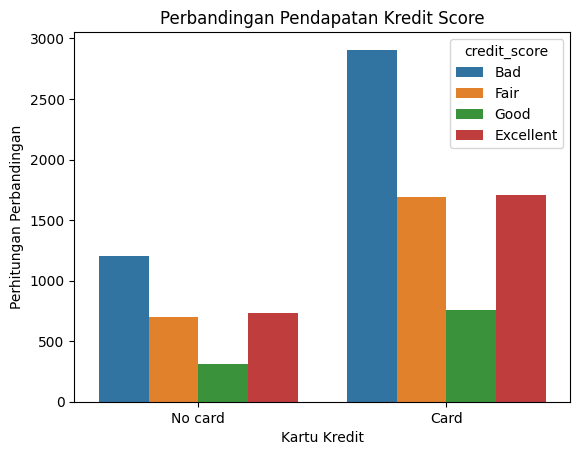

In [3]:
sns.countplot(data = df, x = 'credit_card', hue='credit_score')
plt.xticks(ticks=[0,1],labels=['No card','Card'])
plt.title("Perbandingan Pendapatan Kredit Score")
plt.ylabel("Perhitungan Perbandingan")
plt.xlabel("Kartu Kredit")
plt.show()

Dapat dilihat dari visualisasi Grafik batang diatas, 
didatangkan kesimpulan informasi :

1. Pengguna jasa kredit bank lebih banyak digunakan oleh nasabah yang memiliki kartu kredit.
2. Pada nasabah pemilik kartu kredit dan nasabah yang tidak memiliki kartu, grafik menunjukkan bahwa keduanya sama-sama banyak menghasilkan nilai kredit score yang buruk. Sehingga para nasabah harus mengatur penggunaan kredit.
3. Kredit Score Excellent banyak dihasilkan oleh nasabah pemilik kartu kredit, sehingga bank banyak memberikan layanan kredit pada pengguna kartu.

## Visualisasi Data 2 (Grafik Pie)

## Jumlah Nasabah Yang Tidak Menggunakan Kredit


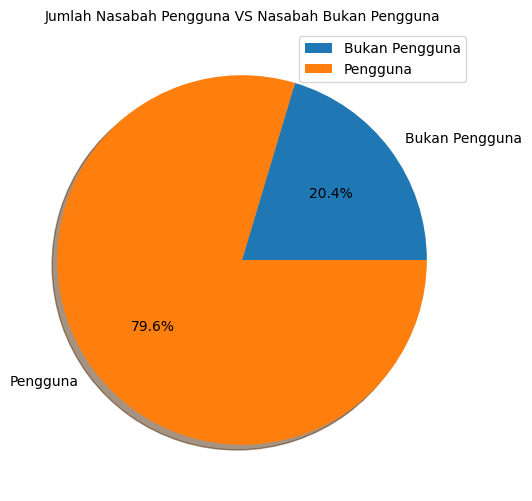

In [4]:
data = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
label = ['Bukan Pengguna', 'Pengguna']

figure, axes = plt.subplots(figsize=(8, 6))
axes.pie(data, 
         labels=label, 
         autopct='%.1f%%',
         shadow=True)

plt.title("Jumlah Nasabah Pengguna VS Nasabah Bukan Pengguna", size = 10)
plt.legend()
plt.show()

Dapat dilihat dari visualisasi Grafik Pie diatas, didapatkan kesimpulan informasi :
- Masih banyak pengguna kredit bank dengan nilai 79.6% dibandingkan nasabah yang sudah tidak menggunakan kredit pada bank dengan nilai 20.4

## Visualisasi Data 3 (Boxplot)

## Usia Nasabah Pengguna Kredit

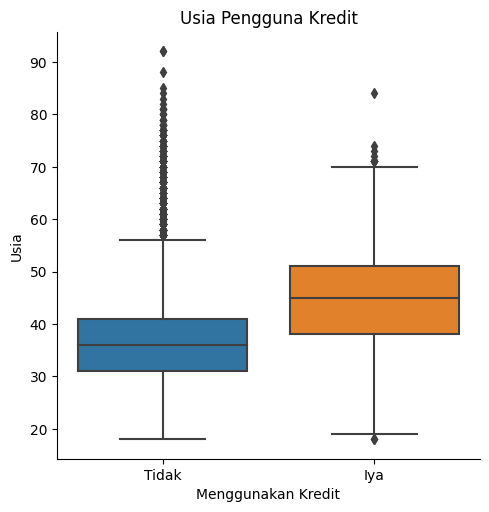

In [6]:
sns.catplot(x='churn', y='age', kind="box", data = df)
plt.title("Usia Pengguna Kredit")
plt.ylabel("Usia")
plt.xlabel("Menggunakan Kredit")
plt.xticks(ticks=[0,1],labels=['Tidak','Iya'])

plt.show()

Distribusi data yang didapat.

- Minimal usia nasabah yang tidak menggunakan kredit adalah umur 18 tahun, dan maksimal antara 57 tahun.
- Banyak nasabah yang tidak menggunakan kredit pada rentang umur 31 sampai dengan 41 tahun.
- Minimal usia nasabah yang mengggunakan kredit adalah umur 19 tahun, dan maksimal antara 70 tahun.
- Banyak nasabah yang menggunakan kredit pada rentang umur 38 sampai dengan 52 tahun.

Melihat distribusi data dari visualisasi boxplot diatas, didapatkan kesimpulan informasi:

- Rata rata nasabah yang tidak menggunakan kredit pada umur 31 sampai 41 tahun, yang berarti bank tidak memberi layanan
- rata rata nasabah menggunakan kredit pada umur 38 sampai dengan 52 tahun, yang berarti bank menyediakan layanan kredit pada nasabah-nasabah tersebut selama 2 tahun.
- sehingga bank masih mendapatkan banyak keuntungan dari layanan kredit
  
sih mendap

## Visualisasi Data 4 (Heatmap)
## Korelasi antar Atribut

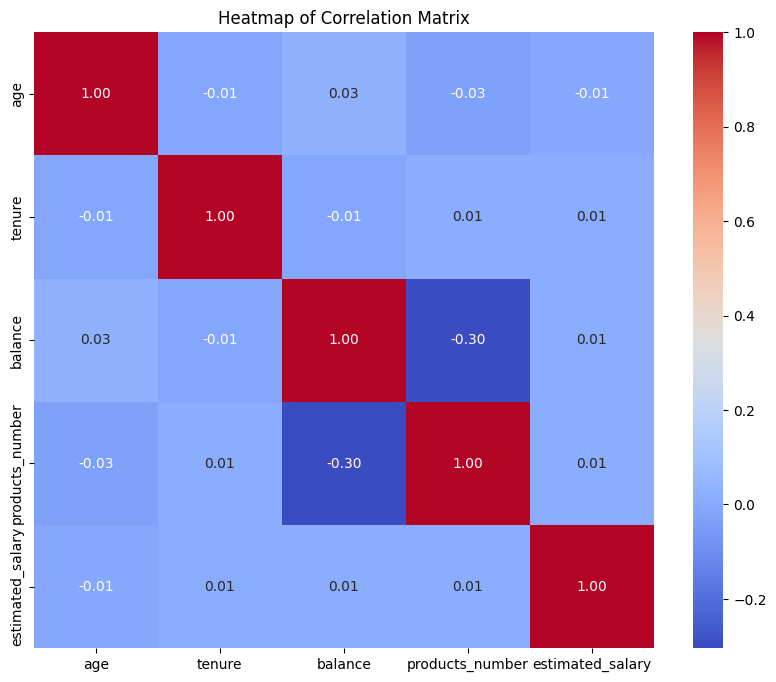

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih semua atribut numerik untuk dianalisis
numerical_attributes = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Hitung matriks korelasi
correlation_matrix = df[numerical_attributes].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


Di heatmap matriks korelasi, kita memfokuskan perhatian pada atribut usia ('age') dan bagaimana atribut ini berkorelasi dengan atribut lainnya:

- Age vs. Tenure (-0.01):
Korelasi antara usia ('age') dan masa tenur ('tenure') terlihat sangat lemah dengan koefisien korelasi sekitar -0.01. Ini menunjukkan bahwa tidak ada korelasi yang signifikan antara usia pelanggan dan berapa lama mereka telah menjadi pelanggan bank. Dalam kata lain, usia pelanggan tidak memengaruhi secara signifikan lamanya mereka tetap menjadi pelanggan bank.

- Age vs. Balance (0.03):
Korelasi antara usia ('age') dan saldo akun ('balance') juga terlihat lemah dengan koefisien korelasi sekitar 0.03. Ini menunjukkan bahwa ada korelasi positif yang sangat lemah antara usia pelanggan dan saldo akun mereka. Dengan kata lain, semakin tua usia pelanggan, mungkin mereka memiliki sedikit saldo akun yang lebih tinggi, tetapi korelasinya sangat rendah.

- Age vs. Product Number (-0.03):
Korelasi antara usia ('age') dan jumlah produk yang dimiliki ('product_number') juga terlihat lemah dengan koefisien korelasi sekitar -0.03. Ini menunjukkan bahwa usia pelanggan memiliki sedikit korelasi negatif yang sangat lemah dengan jumlah produk yang mereka miliki. Dalam hal ini, semakin tua usia pelanggan, jumlah produk yang mereka miliki mungkin sedikit lebih rendah, tetapi pengaruhnya sangat kecil.